Q1-Part1 for data1
Experimental Procedure Used:
Data-1 is an example of univariate linear regression. Here the number of columns of X (attributes) is lesser than number of rows(input data). Hence we use method of projecting the actual output to range(X) and then find weight vector(W), which minimises the error(cost function). Batch gradient descent method is employed for this. Initially we assume weight vector and then find the gradient of cost function. Algorithm then moves in the direction opposite to that of gradient in steps determined by the learning parameter(alpha), to reach to local minima. This method is suitable for convex functions.

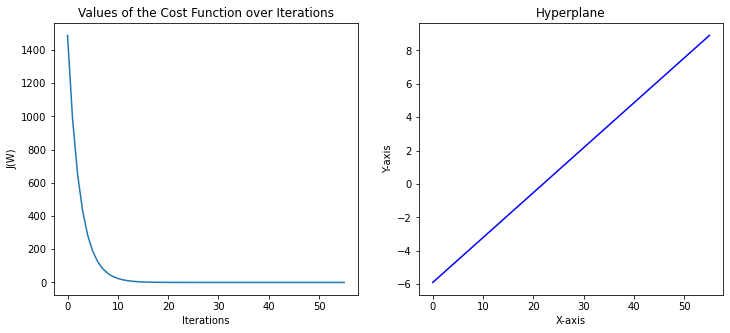

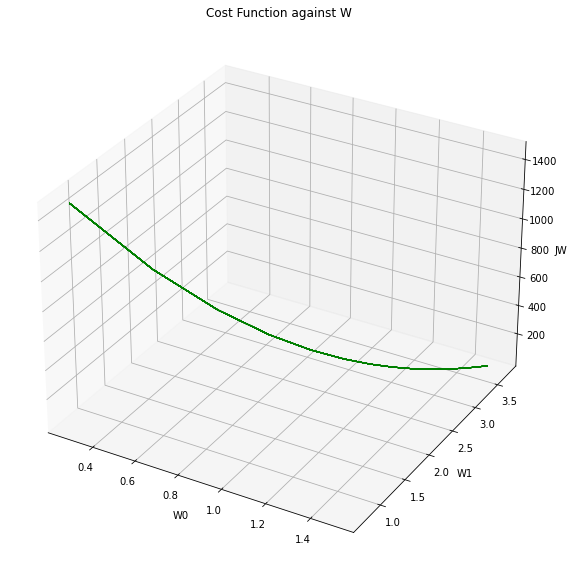

The parameters of the model
y= 1.5 + 3.7 w1


In [1]:
# importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

#importing the data1
df1 = pd.read_csv('data1.csv',header=None, names=['x1','Y']) 

N,n=df1.shape[0], df1.shape[1]
df1.insert(0, 'x0', 1)
X=df1[df1.columns[0:2]]
Y=df1[df1.columns[2]]

# Iterative Gradient descent algorithm
def gradient_descent(X, Y, W, alpha):
    Yp=np.dot(X,W)
    sqr_err=(Yp-Y) ** 2
    Jw=1/(2) * np.sum(sqr_err)
    del_Jw=np.dot(X.T,(Yp-Y))
    w_new=W-alpha * del_Jw
    eps=w_new-W
    norm=LA.norm(eps)
    return w_new,norm,Jw

i,w,W,alpha,norm,cost_func=0,[],np.zeros(2),0.001,10,[]

while(norm > 0.00001 and i < 500):
    w_new,norm,Jw = gradient_descent(X, Y, W, alpha)
    w.append(w_new)
    cost_func.append(Jw)
    W=w_new
    i+=1
    
# Plotting the J(W) against iterations
fig=plt.figure(figsize=(12,5))
ax=plt.subplot(121)
plt.plot(cost_func)
plt.xlabel("Iterations")
plt.ylabel("J(W)")
plt.title("Values of the Cost Function over Iterations")

# Extracting the parameters w0&w1
w=np.array(w)
w0,w1=w[:,0],w[:,1]

# Plotting the hyperplane that generates the data
x_axis=np.linspace(-2,2,len(w))
hyper_plane=W[0]+x_axis*W[1]
ax=plt.subplot(122)
ax.plot(hyper_plane,'b')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Hyperplane")

# Plotting J(W) against W     
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
# ax.plot3D(w0, w1, cost_func, 'green')
# ax.scatter(w0, w1, cost_func)
W0,W1,JW = np.outer(w0, np.ones(len(w0))),np.outer(w1, np.ones(len(w1))),np.outer(cost_func, np.ones(len(cost_func)))
ax.plot_surface(W0, W1, JW, cmap ='viridis', edgecolor ='green')
ax.set_title('Cost Function against W')
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('JW')
plt.show()

# Reporting the parameters of the Model
print("The parameters of the model")
print("y= {} + {} w1".format(str(round(W[0], 2)), str(round(W[1], 2))))





Q1-Part-2 for data2
Experimental Procedure Used:
Data-2 contains is an example of multivariate linear regression. Here the number of columns of X (attributes) is lesser than number of rows(input data).Experimental procedure used is similar to that used for data-1.

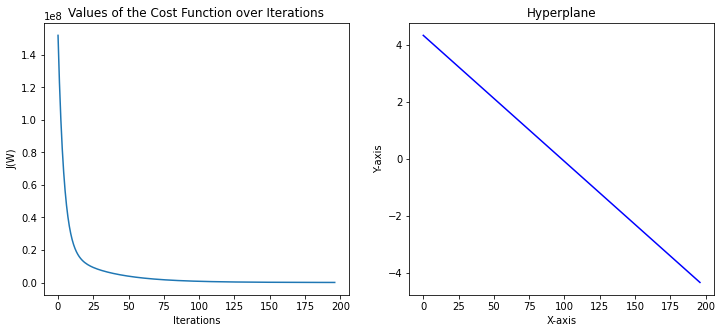

The parameters of the model
y= -0.0 + -2.15 w1 + -0.02 w2


In [2]:
#importing the data1
df2 = pd.read_csv('data2.csv',header=None, names=['x1','x2','Y']) 

N,n=df2.shape[0], df1.shape[1]
df2.insert(0, 'x0', 1)
X=df2[df2.columns[0:3]]
Y=df2[df2.columns[3]]

# Iterative Gradient descent algorithm
def gradient_descent(X, Y, W, alpha):
    Yp=np.dot(X,W)
    sqr_err=(Yp-Y) ** 2
    Jw=1/(2) * np.sum(sqr_err)
    del_Jw=np.dot(X.T,(Yp-Y))
    w_new=W-alpha*del_Jw
    eps=w_new-W
    norm=LA.norm(eps)
    return w_new,norm,Jw

i,w,alpha,norm,cost_func,W=0,[],0.000000001,10,[],np.zeros(3)

while(norm > 0.001 and i < 500):
    w_new,norm,Jw = gradient_descent(X, Y, W, alpha)
    w.append(w_new)
    cost_func.append(Jw)
    W=w_new
    i+=1
    
# Plotting the J(W) against iterations
fig=plt.figure(figsize=(12,5))
ax=plt.subplot(121)
plt.plot(cost_func)
plt.xlabel("Iterations")
plt.ylabel("J(W)")
plt.title("Values of the Cost Function over Iterations")

# Extracting the parameters w0&w1
w=np.array(w)
w0,w1,w2=w[:,0],w[:,1],w[:,2]

# Plotting the hyperplane that generates the data
x_axis=np.linspace(-2,2,len(w))
hyper_plane=W[0]+x_axis*W[1]+x_axis*W[2]
ax=plt.subplot(122)
ax.plot(hyper_plane,'b')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Hyperplane")
plt.show()

# Reporting the parameters of the Model
print("The parameters of the model")
print("y= {} + {} w1 + {} w2".format(str(round(W[0], 2)), str(round(W[1], 2)),str(round(W[2], 2))))

Q2
Experimental Procedure Used:
Data-3 is an example of multivariate linear regression. Here the number of columns of X (attributes) is lesser than number of rows(input data).Here both direct method and gradient descent techniques are employed. Both of them seem to produce closely matching output. 

For direct method pseudo-inverse needs to be computed, which is computationally complex and sometimes unable to obtain, if doesnt exist.

Also train_test_split method of sklearn.model is used to split the data into training and testing groups and performance of the model is estimated using mean-square error as measure.

In [3]:
# importing the required modules
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.model_selection import train_test_split

#importing the data
df3 = pd.read_csv('data3.csv',header=None)
N,n=df3.shape[0], df3.shape[1]

# Assigning Labels to the data
names=[]
for i in range(1,n):
    names.append('x'+str(i))
names.append('Y')
df3.columns = names

# Adding the bias column
df3.insert(0, 'x0', 1)

# Creating the X and Y
X_full=df3[df3.columns[0:51]]
Y_full=df3[df3.columns[51]]

# Splitting data to training and testing groups
X, x_test, Y, y_test = train_test_split(X_full, Y_full, test_size = 0.3)


# Finding the parameter value using direct method using psuedo-inverse
pinv = np.linalg.pinv(X)
W = pinv.dot(Y)
print ("The parameter obtained using direct method is \n", W)

# Iterative Gradient descent algorithm
def gradient_descent(X, Y, W, alpha):
    Yp=np.dot(X,W)
    del_Jw=np.dot(X.T,(Yp-Y))
    w_new=W-alpha * del_Jw
    eps=w_new-W
    norm=LA.norm(eps)
    return w_new,norm

i,w,alpha,norm,W=0,[],0.001,10,np.zeros(51)

while(norm > 0.00001 and i < 500):
    w_new,norm = gradient_descent(X, Y, W, alpha)
    w.append(w_new)
    W=w_new
    i+=1

print("\nThe parameter obtained using iterative algorithm after",i ,"th iteration is \n", w_new)

# Computing the performance measure using mean-square error
y_tp=np.dot(x_test,w_new)
sqr_err=(y_tp-y_test)**2
mse=1/(len(y_test)) * np.sum(sqr_err)
print("\n The mean sqaure error for the model is \n", mse)


The parameter obtained using direct method is 
 [2.34626413e-04 3.00002879e+00 1.30001594e+01 3.99986026e+00
 8.00002160e+00 1.10001381e+01 1.79996553e+01 1.40002286e+01
 1.59998594e+01 2.99975395e+00 1.10001986e+01 1.80001561e+01
 3.00003756e+00 1.29997125e+01 2.00029315e+00 9.00010079e+00
 1.49999772e+01 3.00004899e+00 1.69997367e+01 1.30001097e+01
 1.80000609e+01 1.29999418e+01 8.99994488e+00 1.29999102e+01
 1.00000128e+01 2.00029296e+00 1.30002502e+01 2.00000915e+01
 1.00002599e+01 1.30000812e+01 1.19998481e+01 5.00003160e+00
 1.40002303e+01 4.00018399e+00 1.60003393e+01 5.00041150e+00
 3.99961858e+00 1.49999474e+01 5.99998500e+00 4.00012257e+00
 1.29995588e+01 5.99994715e+00 6.00022252e+00 1.69996233e+01
 8.00012281e+00 3.00002713e+00 3.99954591e+00 8.00003446e+00
 1.80001824e+01 1.19996998e+01 6.00044025e+00]

The parameter obtained using iterative algorithm after 373 th iteration is 
 [2.34776353e-04 3.00002240e+00 1.30000660e+01 3.99984109e+00
 8.00013573e+00 1.10001588e+01 1.7

Q3
Experimental Procedure Used:
Data-4 contains more columns than rows. There may be more than one parameter vector(W) which will generate the given output. So we use Lagrangian formulation to find the best parameter that minimizes the error.

Data is separated into training and testing groups and performance is evaluated using mean-square error.

In [4]:
# importing the required modules
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.model_selection import train_test_split

#importing the data
df4 = pd.read_csv('data4.csv',header=None)
N,n = df4.shape[0], df4.shape[1]

# Assigning Labels to the data
names=[]
for i in range(1,n):
    names.append('x'+str(i))
names.append('Y')
df4.columns = names

# Adding the bias column
df4.insert(0, 'x0', 1)

# Creating the X and Y
X_full=df4[df4.columns[0:n]]
Y_full=df4[df4.columns[n]]

X, x_t, Y, y_t = train_test_split(X_full, Y_full, test_size = 0.3)

# Finding the parameters for the model
a=LA.inv(np.dot(X,X.T))
b=np.dot(a,Y)
W=np.dot(X.T,b)
print("\n The parameters for the model are\n",W)
          
# Computing the performance measure using mean-square error
y_tp=np.dot(x_t,W)
sqr_err=(y_tp-y_t)**2
mse=1/(len(y_t)) * np.sum(sqr_err)
print("\n The mean sqaure error for the model is \n", mse)



 The parameters for the model are
 [-1.38449873e+01  2.71165196e+01 -6.16381409e+00  1.70517010e+01
  1.84322042e+01  6.57678882e+00 -1.25532022e+01  1.24713444e+01
  2.12535201e+01  2.11382848e+01  1.32947096e+01  3.57807702e+01
  1.11416202e+01 -2.48124184e+00  1.49189583e+01 -1.47202646e+01
  7.06331674e+00 -2.50252245e+00  9.95078061e+00  2.79528768e+00
 -1.97615465e+00  1.01400678e+01 -3.54701156e+01  1.20320579e+01
  1.46491613e+01  1.62664983e+01  2.20794673e+01 -1.18115057e+01
 -5.62698840e-01  7.46673442e+00  7.15574588e+00  1.11558980e+01
  1.84496969e+01  5.70355090e+00  2.93373798e+01  2.83359274e+01
 -1.58109396e+00  2.07146063e+01  1.72263986e+01  7.60829904e+00
  3.05285983e+01  6.80914040e+00  1.11799159e+01  2.18868585e+01
  5.28482453e+00  1.25108480e+01  3.16931919e+01  3.69804840e+00
  1.99427414e+01  1.10172289e+01  2.20799019e+01 -2.75493851e+01
  4.31849471e+00  3.90163016e+01  6.01637782e+00  2.09816105e+01
 -1.80310325e+01 -5.22166605e+00 -1.24349969e+00  5.67

Q-4 -(With Normalisation)
Normalisation:
    First data is split into training and testing groups and then Max_Min normalisation technique is employed.It helps in computational easiness and gets rid of units associated with the data. Also convergence is faster.  

In [8]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#importing the data
df5 = pd.read_csv('machine.data',header=None)
N,n=df5.shape[0], df5.shape[1]

# Assigning Labels to the data
names=['Vendor Name', 'Model name', 'MYCT', 'MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
df5.columns = names

# Creating the Augmented matrix XY
XY_full=df5[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]

# Splitting into testing and training data
XY, xy_test = train_test_split(XY_full,test_size = 0.3)
  
# Min-Max Normalisation Method
def min_max_norm(data):
    for column in data.columns:
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())    
    return data

# Iterative Gradient descent algorithm
def gradient_descent(X, Y, W, alpha):
    Yp=np.dot(X,W)
    del_Jw=np.dot(X.T,(Yp-Y))
    w_new=W-alpha * del_Jw
    eps=w_new-W
    norm=LA.norm(eps)
    return w_new,norm

# Normalising the training and testing data
XY_norm = min_max_norm(XY.copy())
xyt_norm = min_max_norm(xy_test.copy())

# Separating out the X,Y matrices
X_norm=XY_norm[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
Y_norm=XY_norm[XY_norm.columns[6]]
Xt_norm=xyt_norm[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
Yt_norm=xyt_norm[xyt_norm.columns[6]]

# Inserting the Bias column
X_norm.insert(0, 'Bias', 1)
Xt_norm.insert(0, 'Bias', 1)

# Holdout Method
w=[]
alpha=np.linspace(0.001,0.009,30)
for j in alpha:
    i,W,norm=0,np.zeros(7),10
    while(norm > 0.001 and i < 500):
        w_new,norm = gradient_descent(X_norm, Y_norm, W, j)
        w.append(w_new)
        W=w_new
        i+=1

    # Computing the performance measure using mean-square error
    y_tp=np.dot(Xt_norm,w_new)
    sqr_err=(y_tp-Yt_norm)**2
    mse=1/(len(Yt_norm)) * np.sum(sqr_err)

print('\n Result of Holdout method')
print("\nThe parameter obtained using holdout method is", w_new)
print("\n The mean sqaure error for the model is", mse)

# Monte-Carlo Cross validation
w,mse_full=[],[]
alpha=np.linspace(0.001,0.009,10)
for j in alpha:
    W=np.zeros(7)
    for i in range(30):
        # Splitting into testing and training data
        XY, xy_test = train_test_split(XY_full,test_size = 0.3, shuffle=True)

        # Normalising the training and testing data
        XY_norm = min_max_norm(XY.copy())
        xyt_norm = min_max_norm(xy_test.copy())

        # Separating out the X,Y matrices
        X_norm=XY_norm[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
        Y_norm=XY_norm[XY_norm.columns[6]]
        Xt_norm=xyt_norm[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
        Yt_norm=xyt_norm[xyt_norm.columns[6]]

        # Inserting the Bias column
        X_norm.insert(0, 'Bias', 1)
        Xt_norm.insert(0, 'Bias', 1)
        
        w_new,norm = gradient_descent(X_norm, Y_norm, W, j)
        w.append(w_new)
        W=w_new

        # Computing the performance measure using mean-square error
        y_tp=np.dot(Xt_norm,w_new)
        sqr_err=(y_tp-Yt_norm)**2
        mse=1/(len(Yt_norm)) * np.sum(sqr_err)
        mse_full.append(mse)

print("\n \n \n The result of Monte-Carlo Cross Validation")
print("\n The mean sqaure error for the model is", mse_full)
print("\n The average mean sqaure error for the model is", np.sum(mse_full)/len(mse_full))

#K-fold cross validation

X=df5[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
y = df5[df5.columns[6]] 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
print('\n \n \n Result of K-fold method') 
print('\n accuracy of each fold - {}'.format(acc_score))
print('\n Avg accuracy : {}'.format(avg_acc_score))


 Result of Holdout method

The parameter obtained using holdout method is [-0.05586146  0.05687045  0.29614915  0.38252619  0.17273686  0.07206486
  0.19370532]

 The mean sqaure error for the model is 0.004977304517623905

 
 
 The result of Monte-Carlo Cross Validation

 The mean sqaure error for the model is [0.026718024491094852, 0.03534763184714582, 0.053512064766861954, 0.0186842041624721, 0.02403465439229216, 0.05184749399191699, 0.015594637599184596, 0.01753798808656602, 0.03741329703363207, 0.03260379085688032, 0.022999832635722847, 0.020264176336045856, 0.03730002467597853, 0.06911220425788486, 0.042737316335164734, 0.05315523506642364, 0.014246324756719582, 0.04122486798550836, 0.017688594284014158, 0.015493294989155486, 0.014818336625678006, 0.020479166443489873, 0.031764534731395684, 0.01308373598850245, 0.02872349166912834, 0.0118870190536139, 0.023584745065417058, 0.024183054458139994, 0.01699575431681188, 0.011711972786689622, 0.055323029741352205, 0.02234454381253685,

Q-4 -(Without Normalisation)
Mean Square error is high compared to that obtained using normalisation

In [9]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.model_selection import train_test_split


#importing the data
df5 = pd.read_csv('machine.data',header=None)
N,n=df5.shape[0], df5.shape[1]

# Assigning Labels to the data
names=['Vendor Name', 'Model name', 'MYCT', 'MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
df5.columns = names

# Creating the Augmented matrix XY
XY_full=df5[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]

# Splitting into testing and training data
XY, xy_test = train_test_split(XY_full,test_size = 0.3)
  
# Separating out the X,Y matrices
X=XY[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
Y=XY[XY.columns[6]]
Xt=xy_test[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
Yt=xy_test[xy_test.columns[6]]

# Inserting the Bias column
X.insert(0, 'Bias', 1)
Xt.insert(0, 'Bias', 1)

# Computing the parameter using direct method
pinv = np.linalg.pinv(X)
W = pinv.dot(Y)

# Computing the performance measure using mean-square error
y_tp=np.dot(Xt,W)
sqr_err=(y_tp-Yt)**2
mse=1/(len(Yt)) * np.sum(sqr_err)

print ("The parameter obtained using direct method is \n", W)
print("\n The mean sqaure error for the model is", mse)

The parameter obtained using direct method is 
 [-5.98917345e+01  5.31779407e-02  1.51603252e-02  5.82024221e-03
  6.27992415e-01 -2.58685291e-01  1.74650623e+00]

 The mean sqaure error for the model is 2854.1100316497823


In [1]:
import pandas as pd

In [6]:
ajay_file=pd.read_csv("data3.csv")

In [7]:
ajay_file

,-0.20194,1.2003,1.5898,-1.5988,-0.16687,0.18943,-1.2049,0.33534,-0.69619,2.1643,...,-1.4218,0.78505,0.70262,-2.3537,1.3947,0.35011,2.0849,-1.4874,-0.62893,52
0,0.86107,-0.107280,-2.031800,-0.846320,0.14752,0.118570,0.85306,-0.59189,-0.267970,1.65540,...,0.48337,0.91948,0.68379,-0.253330,0.032124,1.173800,1.550900,-0.411230,0.23187,10.3780
1,1.55820,0.619500,2.355200,0.044202,-1.07630,2.440900,-0.30732,0.62645,-0.338810,0.06896,...,0.21967,-0.23811,0.70586,2.390900,0.729670,-0.448490,0.940510,0.005634,-0.19214,183.3300
2,-0.12968,1.091000,0.764040,-0.057685,-0.10341,0.670600,0.24801,-0.69294,1.326400,-1.00900,...,1.11410,0.99151,0.17876,0.027139,0.510250,-0.628680,-0.179560,0.615190,-0.46937,-37.4080
3,-0.81777,-0.442030,-2.114700,-0.122620,-0.31536,-0.679530,0.60266,-0.83188,-0.447570,-0.58308,...,0.52212,-0.19912,0.29868,-0.556280,1.257500,-0.097418,0.051225,0.962500,1.47100,-49.2370
4,0.28851,-1.280800,-0.090353,1.037200,-0.37326,0.048529,-0.20771,-0.65208,0.023475,-0.68382,...,-0.13356,1.31790,-0.84515,0.076021,-0.949810,0.524310,1.808800,1.216800,-1.46530,4.6476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1.49990,-0.742820,1.149900,1.424700,-1.05390,-0.174850,1.13170,-0.70489,0.434590,1.04980,...,0.02773,0.16156,-1.59080,0.017211,0.845070,-1.848500,0.998420,-0.761770,-1.44190,102.8600
195,-0.13238,-0.096305,0.989450,0.550280,0.14950,1.986700,-0.23552,0.98831,-0.835960,1.98440,...,0.83183,0.34156,1.23350,-0.284060,0.639190,-0.474810,-0.106200,-2.790200,0.69047,148.7400
196,1.25780,-0.995230,-1.892900,1.942500,-1.23190,0.057357,-1.10740,1.99350,0.798270,-0.74187,...,-0.42999,0.54898,0.42629,0.979670,0.739140,0.805420,-0.896220,-2.191300,0.73163,-81.5630
197,1.09330,-1.231300,0.294600,-0.693620,-0.77123,0.174780,1.13540,0.27561,-2.407200,1.33980,...,-1.05350,0.60660,1.23060,0.542890,0.002744,1.755500,-0.210600,-1.238700,1.89160,4.4495
